In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores

from transformers import AutoModelForSeq2SeqLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-language-models/T5Decoder-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [4]:
path = ["decoder.block[", "].layer[0].SelfAttention.q.weight", "].layer[0].SelfAttention.k.weight"]

'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-small'] = [l, d, h, dh, score_List]

In [5]:
model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [6]:
'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-small")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-small-v1.1'] = [l, d, h, dh, score_List]

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


RuntimeError: shape '[512, 8, 64]' is invalid for input of size 196608

In [7]:
model

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
              (wo): 

In [3]:
path = ["decoder.block[", "].layer[0].SelfAttention.q.weight", "].layer[0].SelfAttention.k.weight"]

'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-small")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-small'] = [l, d, h, dh, score_List]

'T5 small model (l = 6, d = 512, h = 8 ; tot num parameters 60.5M)'
dh = 64
l = 6
d = 512
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-small")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-small-v1.1'] = [l, d, h, dh, score_List]

'T5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
dh = 64
l = 12
d = 768
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-base")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-base'] = [l, d, h, dh, score_List]

# 'T5 base model (l = 12, d = 768, h = 12 ; tot num parameters 223M)'
# dh = 64
# l = 12
# d = 768
# h = d // dh

# model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-base")
# score_List= get_scores(d, l, h, dh, model, path)
# models['T5-base-v1.1'] = [l, d, h, dh, score_List]


'T5 large model (l = 24, d = 1024, h = 16 ; tot num parameters 738M)'
dh = 64
l = 24
d = 1024
h = d // dh

model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-large")
score_List= get_scores(d, l, h, dh, model, path)
models['T5-large'] = [l, d, h, dh, score_List]

# 'T5 large model (l = 24, d = 1024, h = 16 ; tot num parameters 738M)'
# dh = 64
# l = 24
# d = 1024
# h = d // dh

# model = AutoModelForSeq2SeqLM.from_pretrained("google/t5-v1_1-large")
# score_List= get_scores(d, l, h, dh, model, path)
# models['T5-large-v1.1'] = [l, d, h, dh, score_List]

# 'T5 3b model (l = 12, d = 4096, h = 32 ; tot num parameters 2.85B)'
# dh = 64
# l = 24
# d = 1024
# h = d // dh

# model = AutoModelForSeq2SeqLM.from_pretrained("google-t5/t5-large")
# score_List= get_scores(d, l, h, dh, model, path)
# models['T5-large'] = [l, d, h, dh, score_List]


In [4]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

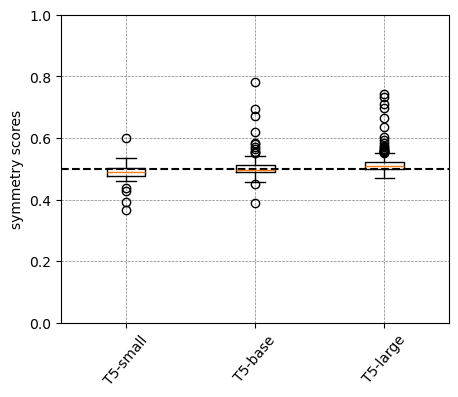

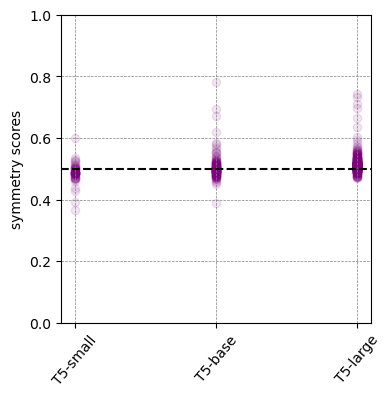

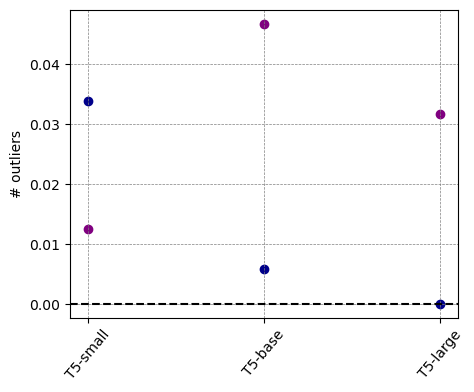

In [5]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)